In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.simple_keypoint_dataset import SimpleKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'keypoint_detection_results'
keypoint_3d_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_hip=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/prediction/linear_model/'


train_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_train.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)
val_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_val.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)
test_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_test.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234


skipping problematic image 262501
skipping problematic image 278126
skipping problematic image 293751
skipping problematic image 309376
skipping problematic image 325001
skipping problematic image 340626
skipping problematic image 356251
skipping problematic image 371876
skipping problematic image 512501
skipping problematic image 528126
skipping problematic image 543751
skipping problematic image 559376
skipping problematic image 575001
skipping problematic image 590626
skipping problematic image 606251
skipping problematic image 621876
skipping problematic image 762501
skipping problematic image 778126
skipping problematic image 793751
skipping problematic image 809376
skipping problematic image 825001
skipping problematic image 840626
skipping problematic image 856251
skipping problematic image 871876
skipping problematic image 387501
skipping problematic image 403126
skipping problematic image 418751
skipping problematic image 434376
skipping problematic image 637501
skipping probl

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/prediction/linear_model/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 5575.564384460449


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 5855 batches: 420.2575311713703
val MPJPE from: 37440 samples : 280.597448348999


Validation: 0it [00:00, ?it/s]

check #2
training loss from 5855 batches: 307.423977236988
val MPJPE from: 37440 samples : 279.00949120521545


Validation: 0it [00:00, ?it/s]

check #3
training loss from 5855 batches: 303.91302146940126
val MPJPE from: 37440 samples : 278.8807451725006


Validation: 0it [00:00, ?it/s]

check #4
training loss from 5855 batches: 302.5515452752655
val MPJPE from: 37440 samples : 277.72992849349976


Validation: 0it [00:00, ?it/s]

check #5
training loss from 5855 batches: 301.84562505055044
val MPJPE from: 37440 samples : 277.7062952518463


Validation: 0it [00:00, ?it/s]

check #6
training loss from 5855 batches: 301.44046552154776
val MPJPE from: 37440 samples : 277.97552943229675


Validation: 0it [00:00, ?it/s]

check #7
training loss from 5855 batches: 301.19966257850297
val MPJPE from: 37440 samples : 277.81689167022705


Validation: 0it [00:00, ?it/s]

check #8
training loss from 5855 batches: 300.93936398943504
val MPJPE from: 37440 samples : 277.41605043411255


Validation: 0it [00:00, ?it/s]

check #9
training loss from 5855 batches: 300.7039090489649
val MPJPE from: 37440 samples : 277.26173400878906


Validation: 0it [00:00, ?it/s]

check #10
training loss from 5855 batches: 300.5812594617767
val MPJPE from: 37440 samples : 277.442991733551


Validation: 0it [00:00, ?it/s]

check #11
training loss from 5855 batches: 300.42456838435135
val MPJPE from: 37440 samples : 277.0865559577942


Validation: 0it [00:00, ?it/s]

check #12
training loss from 5855 batches: 300.2716334124695
val MPJPE from: 37440 samples : 277.1998643875122


Validation: 0it [00:00, ?it/s]

check #13
training loss from 5855 batches: 300.14043570481033
val MPJPE from: 37440 samples : 277.4147391319275


Validation: 0it [00:00, ?it/s]

check #14
training loss from 5855 batches: 300.0823832036694
val MPJPE from: 37440 samples : 277.2328555583954


Validation: 0it [00:00, ?it/s]

check #15
training loss from 5855 batches: 300.048835648114
val MPJPE from: 37440 samples : 277.10357308387756


Validation: 0it [00:00, ?it/s]

check #16
training loss from 5855 batches: 300.0138392975756
val MPJPE from: 37440 samples : 277.0928144454956


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/prediction/linear_model/lightning_logs/version_0/checkpoints/epoch=54-step=64405.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/prediction/linear_model/lightning_logs/version_0/checkpoints/epoch=54-step=64405.ckpt
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/co

Testing: 0it [00:00, ?it/s]

MPJPE: 276.49323852952773
PJPE
                      PJPE
nose            271.400597
left_eye        273.985951
right_eye       267.425670
left_ear        271.491470
right_ear       256.515283
left_shoulder   277.273905
right_shoulder  222.456529
left_elbow      313.696747
right_elbow     250.935281
left_wrist      348.043222
right_wrist     310.792728
left_hip        278.885170
right_hip       251.509548
activities_mpjpe:
{}
test mpjpe: 276.49323852952773


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    276.49323852952773     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 276.49323852952773}]

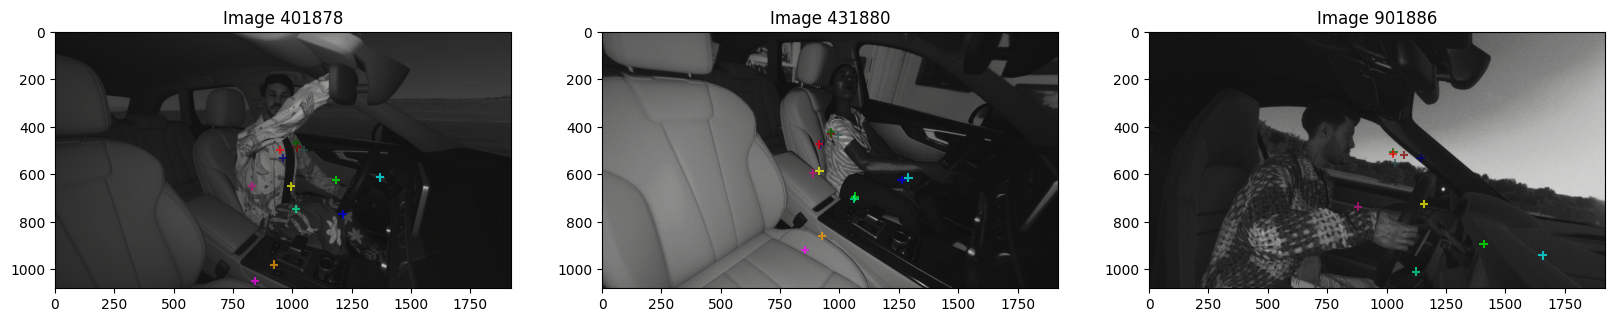

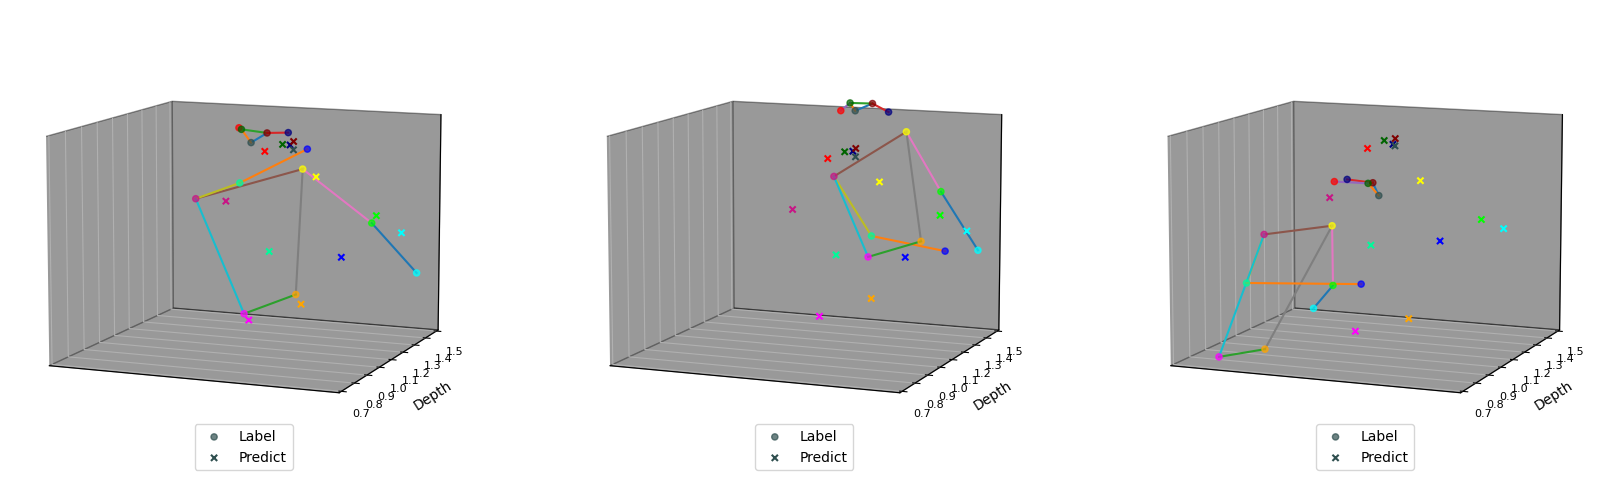

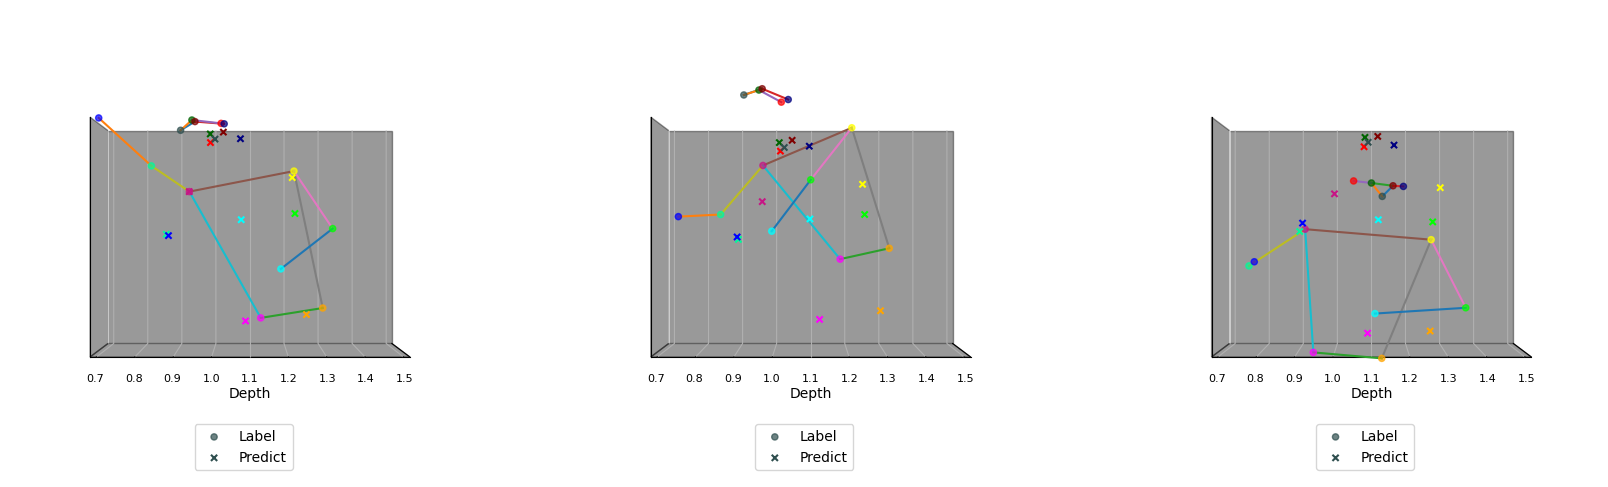

In [13]:
plot_samples(
    dataset_root_path,
    trainer.model,
    val_loader,
    img_figsize=(20, 10),
    img_width=image_width,
    img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)